## **Diagnosing diabetes in female patients**
The aim of this project is to build a classification model to help diagnose diabetes in female patients. 

Records were collected by the National Istitute of Diabetes and Digestive and Kidney Diseases in a group of females over the age of 21 of Pima Indians heritage. Data set includes 768 records and 9 attributes: glucose level, insulin level, blood pressure, number of pregnancies, BMI, age, Diabetes Pedigree Function (based on family medical history), skin thickness and Outcome. The last column, Outcome, represents the decision attribute - 1 indicates that patient has diabetes, 0 that they are healthy. 


# Step 1: Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Step 2: Data exploration

In [3]:
#exploring the size of diabetes data set
df.shape

(768, 9)

In [ ]:
#printing first 5 rows of the data set, together with column names
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing basic info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# printing basic statistics 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


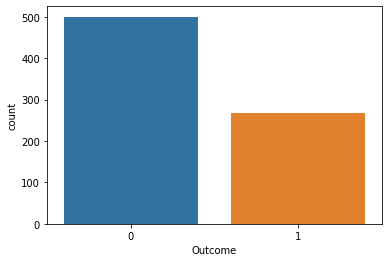

In [ ]:
#visualizing the Outcome countplot
sns.countplot(x = 'Outcome',data = df)

From above countplot it can be concluded that the data set is a little imbalaced. Number of patients diagnosed with diabetes is higher than healthy ones.

# Step 3: Data visualization

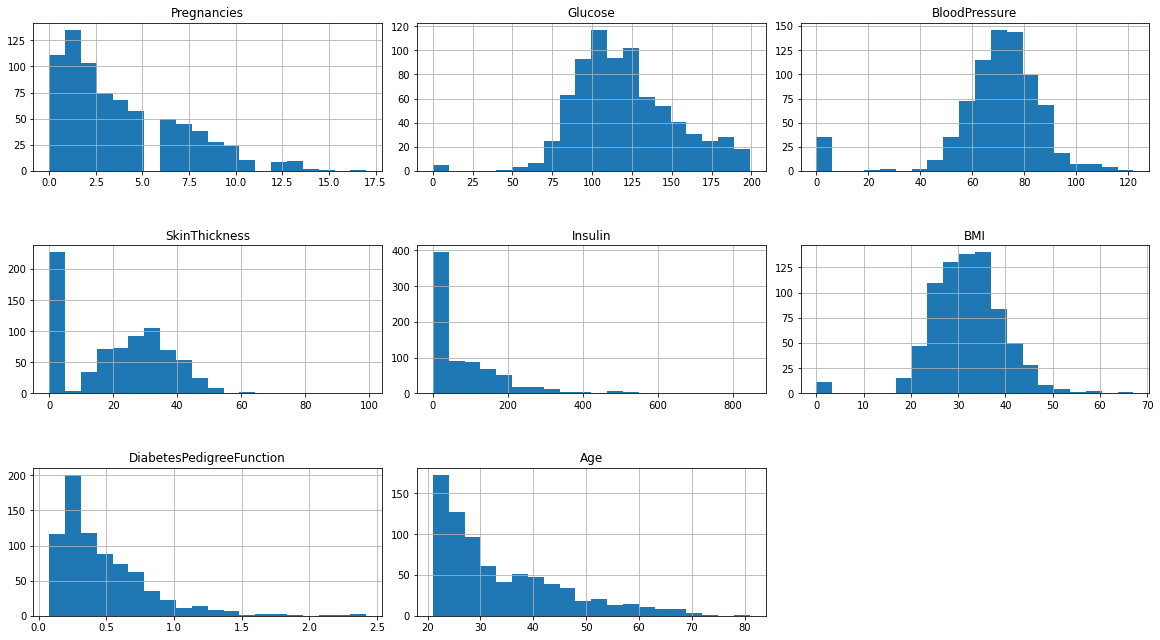

In [ ]:
#plotting histograms for each feature
import itertools

col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

Histograms of all features show that not all attributes can be characterized as normal distribution.

In case of Insulin, Skin Thickness, and Diabetes Pedigree Function, we can easily notice the most dominant value for each feature. However, this might be caused by missing values being denoted as '0' in the data set. 

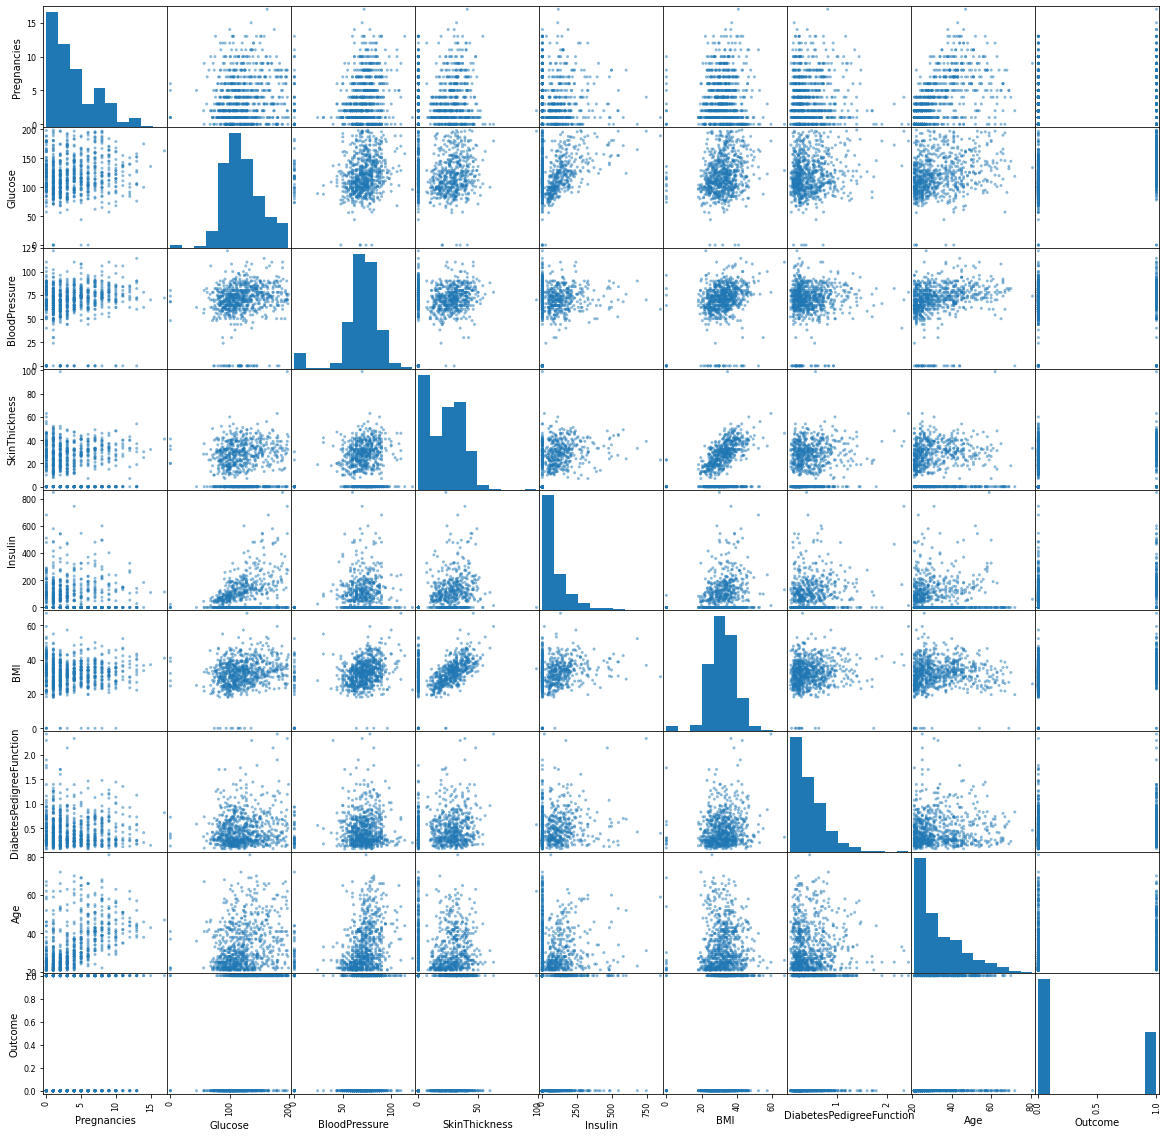

In [4]:
# plotting scatter plot matrix to explore correlations
pd.plotting.scatter_matrix(df, figsize = (20, 20));

At first glance, the above scatter matrix does not show any strong correlations between features. 

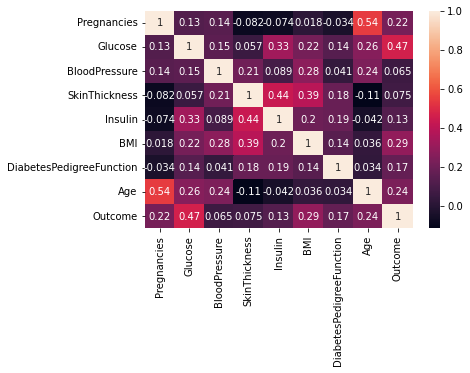

In [ ]:
# plotting correlation heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

Correlation heatmap shows that Outcome is positively correlate with all of the features. The strongest correlations to Outcome are:
- Outcome vs Glucose (0.49)
- Outcome vs BMI (0.29)
- Outcome vs Age (0.27)

The weakest correlations to Outcome are:
- Outcome vs SkinThickness (0.075)
- Outcome vs BloodPressure (0.065)


However, it is important to emphasize that the above heatmap corresponds to data set containing missing values. Upon visual exploration, missing values were identified as '0', and  therefore strongly influence the final picutre.  

#Step 4: Tackling the missing values

Missing values in the data set are denoted as '0'. The simplest solution would be to replace all 0 values with NaN and count them.

However, it would not work in this case, as the decision attribute also takes  the value of 0 as a valid number. Replacing every 0 in the data set would  replace the values of Outcome attribute, therefore making it almost impossible to work with. 

Dropping the rows containing missing values is also risky, as it is not known yet how many missing values are present.

To tackle this problem, missing values will first be counted, and if their number is signifcant, they will be replaced with a chosen statistical value for each category.

In [6]:
#replacing missing values (initilly denoted as '0' with NaN)
df2 = df
df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df2[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
#counting missing values for each attribute
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values are present in Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. For Insulin, they make up around half of the records.

In [8]:
#printing basic statistics for data set with NaN as missing values 
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since the number of missing values is quite high for some attributes, like SkinThickness or Insulin, let's try to replace the missing values with means for each attribute.

From the histograms of each feature it can be observed that Skin Thickness, BMI, Blood Pressure, and Glucose follow a normal distirbution, so it makes sense to replace the missing values with mean value. However, Insulin distribution is skewed, hence it would be a better choice to use median instead.

Once missing values are replaced, it will be possible to compare how the statistics for raw data set and data set without missing values have changed.

In [9]:
#replacing missing values with mean values for each attribute
df2["Glucose"].fillna(df2["Glucose"].mean(), inplace = True)
df2["BloodPressure"].fillna(df2["BloodPressure"].mean(), inplace = True)
df2["SkinThickness"].fillna(df2["SkinThickness"].mean(), inplace = True)
df2["Insulin"].fillna(df2["Insulin"].median(), inplace = True)
df2["BMI"].fillna(df2["BMI"].mean(), inplace = True)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


In [10]:
#printing statistics for data set without missing values
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Replacing NaN values in data set has an influence on set's statistics. Let's take a look at Skin Thickness and Insulin, as those features had the highest number of missing values.

For Skin Thickness, the mean did not change, but standard deviation dropped from 10.47 to 8.79. 

For Insulin, the mean value dropped from 155.55 to 140.67. Standard deviation value shows similar trend, with a drop from 118.77 to 86.30. 

Data is still moderately spread out, but decreasing the value of standard deviation by replacing NaN with mean and median has allowed to obtain a data set that is a little more clustered around the average value. 


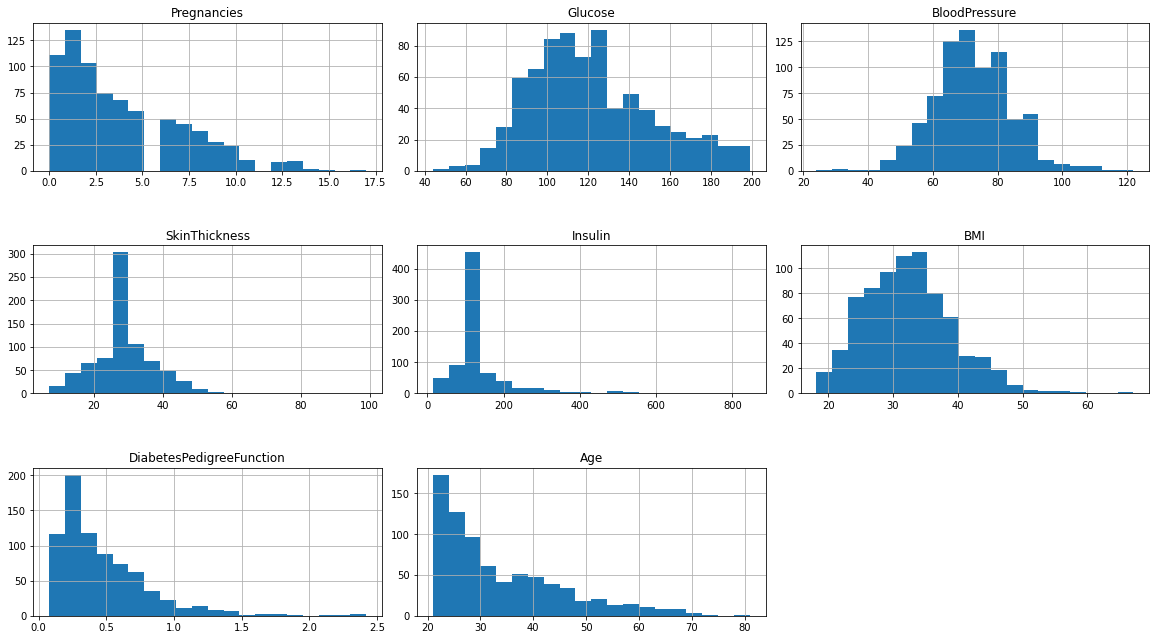

In [11]:
#plotting histograms of each feature on data set after replacing missing values
import itertools

col = df2.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df2[i].hist(bins = 20)
    plt.title(i)
plt.show()

From above histograms it can be clearly noticed that the distribution of some of the features was heavily influenced. BMI, Glucose, and Blood Pressure still resemble normal distribution, even after replacing NaN values.

However, for Skin Thickness and Insulin we can now observe clearly the most dominant feature in the data set, which is mean for Skin Thickness, and median for Insulin.

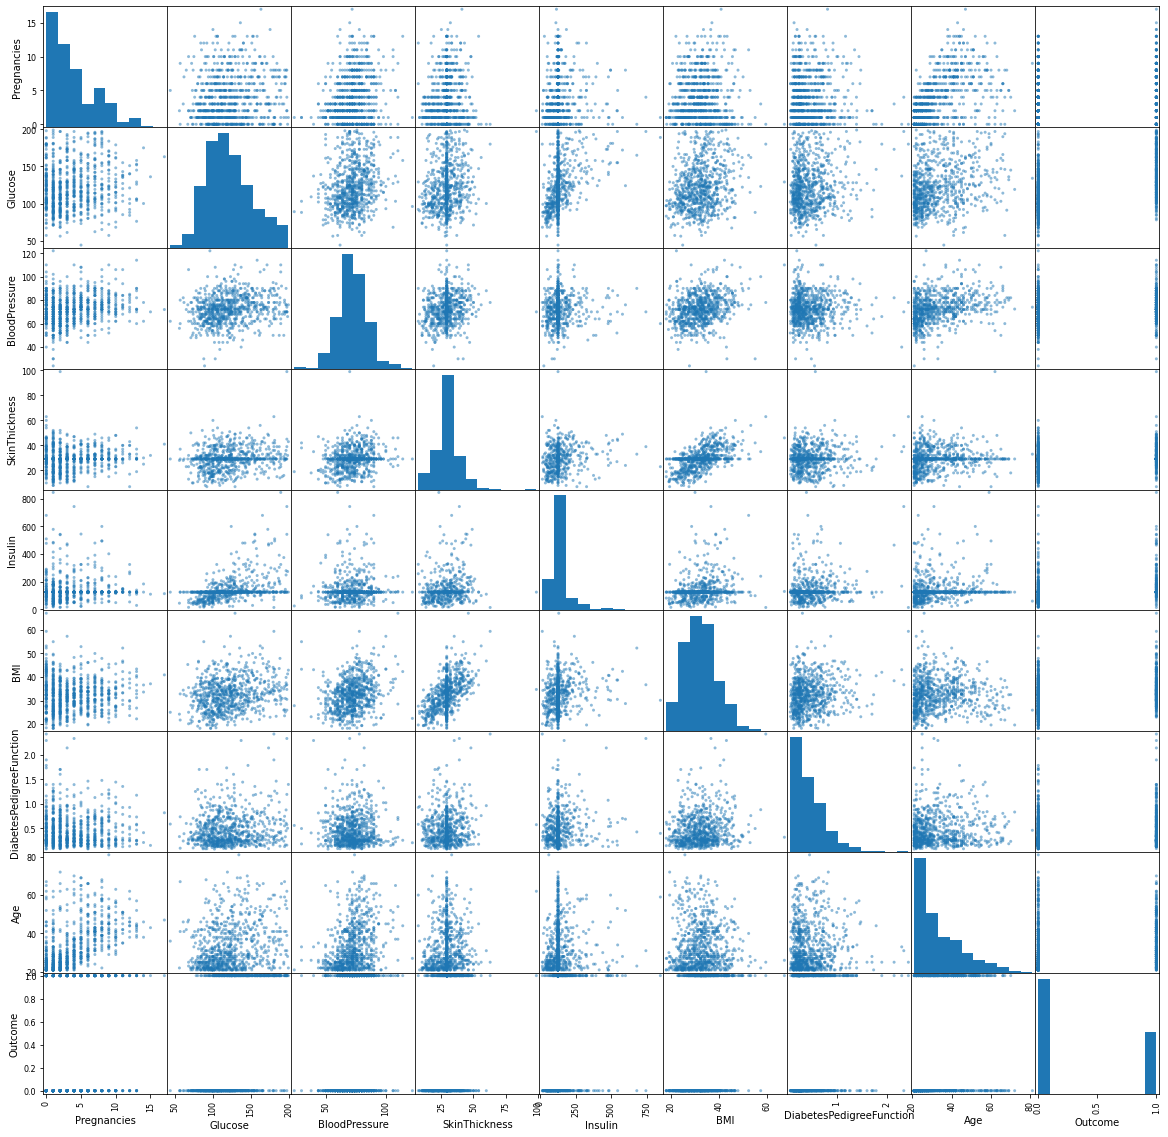

In [12]:
#plotting scatter matrixes on data set after replacing missing values
import pandas
pd.plotting.scatter_matrix(df2, figsize = (20, 20));

Plotting the scatter matrixes allows to visually explore correlations between data. After transforming the data set by replacing NaN values, some trends in correlations are stronger than the ones in raw data set. 

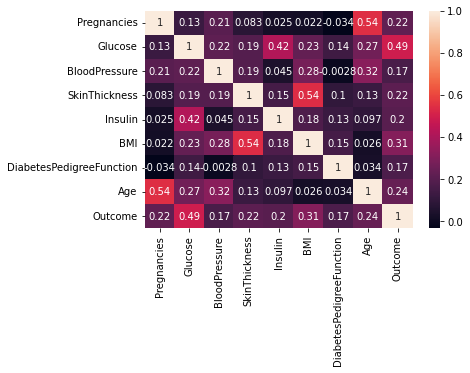

In [13]:
#plotting heat map on data set after replacing missing values
sns.heatmap(df2.corr(), annot = True)
plt.show()

Replacing the NaN values with means seems to have a positive effect on increasing the correlation between features and Outcome. In fact, the correlation between Outcome and Glucose increased from 0.47 to 0.49, Outcome and Insulin from 0.13 to 0.20, Outcome and BMI from 0.29 to 0.31. 

What is even more interesting, providing more data for Skin Thickness and BloodPressure revealed that those two are also correlated with Outcome result. For Outcome vs Skin Thickness, correlation skyrocketed from 0.075 to 0.22, whereas for Outcome vs Blood Pressure from 0.065 to 0.17.

All values have correlation value with Outcome of at least +0.17, but the weakest ones are Diabetes Pedigree Function and Blood Pressure.

#Step 5: Feature scaling

Feature Scaling is used to standarize the independent features in a data set in a fixed range. This method can significantly improve model's performance, as well as help stabilize model's accuracy.

For the purpose of this project, MinMax Scaler will be implemented. 
MinMax Scaler shrinks the data within the given range, usually of 0 to 1.  It scales the values without changing the shape of the original distribution.

In [14]:
#implementing MinMaxScaler, with range [0,1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df2_scaled = sc.fit_transform(df2)
taset_scaled = sc.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled)

In [15]:
#priting scaled data set
df2_scaled

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.133413,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.133413,0.243354,0.115713,0.433333,1.0


# Step 6: Modelling

In this part, 3 models will be implemented - knn, decision tree, and random forest. For all models, parameter tunning will be performed in order to maximize models' optimization. Then, models will be evaluated and overall performance will be compared.


**K Neareast Neighbours model**

For KNN model, it is crucial to understand what is the best k number for chosen data set. In order to find it, a graph of Accuracy vs n_estimators will be plotted. 


In [24]:
X = df2_scaled.iloc[:, [1,4,5,7]].values
Y = df2_scaled.iloc[:, 8].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df2['Outcome'] )

In [26]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


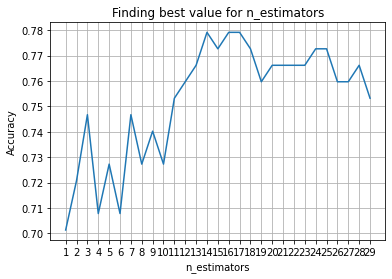

Highest value:  0.7792207792207793


In [27]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 30))
acc = pd.Series()
x = range(1,30)

for i in list(range(1, 30)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

From the above graph, it can be concluded that the best possible number of k neighbours for this data set could be 14, 16, or 17. Moreover, the best accuracy score that could be obtained with KNN model for this data set is 0.78. 

Let's now test the model with different parameters.

*'weights = uniform'*

In this model, all points in each neighborhood are weighted equally.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 14, weights = 'uniform', metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [68]:
Y_pred_knn = knn.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_knn

0.7792207792207793

In [70]:
from sklearn.metrics import classification_report
print('Model with k= 14: \n', classification_report(Y_test, Y_pred_knn))

Model with k= 14: 
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



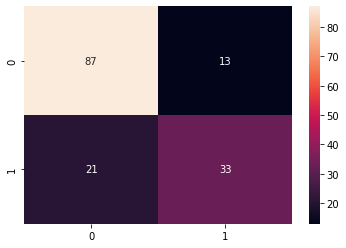

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
sns.heatmap(pd.DataFrame(cm), annot=True)

*'weights = distance'*

In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 14, weights = 'distance', metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [73]:
Y_pred_knn = knn.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_knn

0.7532467532467533

In [75]:
from sklearn.metrics import classification_report
print('Model with k= 16: \n', classification_report(Y_test, Y_pred_knn))

Model with k= 16: 
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



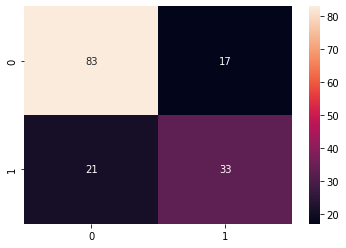

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
sns.heatmap(pd.DataFrame(cm), annot=True)

From the above analysis it can be concluded that weights = 'uniform' gives a better accuracy score (0.78) than weights = 'distance' (0.75). When we look at other statistics, the precision of a model with 'distance' is much smaller than with the first one. In terms of recall, we can observe a similar trend. 

Additionally, the number of TP is higher by 4 for weights = 'uniform' than weights = 'distance'. The number of TN remains unchanged.


**Decision Tree model**

*'criterion = gini'*

The function measures the quality of a split. Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree.

In [77]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
Y_pred_dectree = dectree.predict(X_test)

In [79]:
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_dectree

0.7012987012987013

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



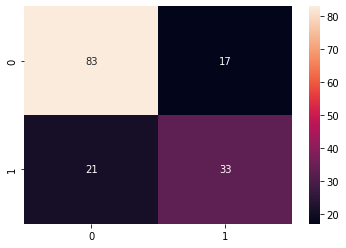

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
sns.heatmap(pd.DataFrame(cm), annot=True)

*'criterion = entropy'*


In [82]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [83]:
Y_pred_dectree = dectree.predict(X_test)

In [84]:
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_dectree

0.7012987012987013

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



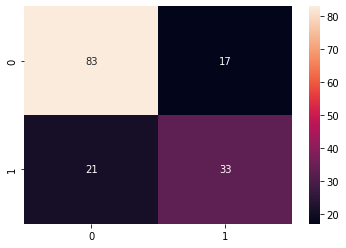

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
sns.heatmap(pd.DataFrame(cm), annot=True)

Above analysis shows that for this model, it does not matter whether gini or entropy criterion is chosen. Both parameters produce the same output. 

*'splitter = random'*

In [87]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(splitter = 'random', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42, splitter='random')

In [88]:
Y_pred_dectree = dectree.predict(X_test)

In [89]:
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_dectree

0.6818181818181818

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



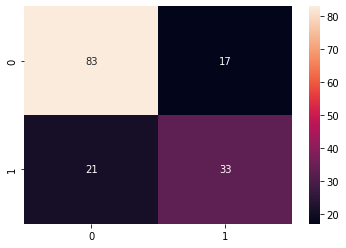

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
sns.heatmap(pd.DataFrame(cm), annot=True)

There are two possible strategies of choosing the best split at each node. Supported strategies are 'best' to choose the best split and 'random' to choose the best random split. 'Best' is the default one.

In the case of Diabetes data set, it turns out that choosing 'best' as the parameter produces better results (accuracy of 0.70) than 'random' (0.68).

**Random Forest model**

*n_estimators = 5*

In [98]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=42)

In [99]:
Y_pred_ranfor = ranfor.predict(X_test)

In [100]:
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_ranfor

0.7402597402597403

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



*n_estimators = 15*

In [105]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=42)

In [106]:
Y_pred_ranfor = ranfor.predict(X_test)

In [107]:
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_ranfor

0.7597402597402597

In [109]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



*n_estimators = 35*

In [118]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=35, random_state=42)

In [119]:
Y_pred_ranfor = ranfor.predict(X_test)

In [120]:
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_ranfor

0.7792207792207793

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



For Random Forest, the best results were obtained with n_estimators = 35. Model was also tested on higher number of estimators, but no further improvements were noted.

# Summary

To summarize, KNN classifier with k=14 or 16 or 17 gave similar scores to Random Forest with n_estimators = 35. Changing the weights parameter in KNN from 'uniform' to 'distance' worsened model's performance. The best accuracy obtained was 0.78.

In case of Decsion Tree, splitter = 'best' produced the best outcome, and changing the criterion to entropy did not influence the performance. The best accuracy obtained was 0.78.

For Random Forest, the best results were obtained with n_estimators = 35. Model was also tested with higher numbers, but it did not improve the performance. The best accuracy score obtained was 0.78.

To sum up, for Diabetes data set with replaced NaN values, outcome produced by KNN classifier and Random Forest Classifier were equally good. 